In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'keras'

In [2]:
train=pd.read_csv("sign_mnist_train.csv")
test=pd.read_csv("sign_mnist_test.csv")

In [3]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [4]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


C:\Users\imson\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

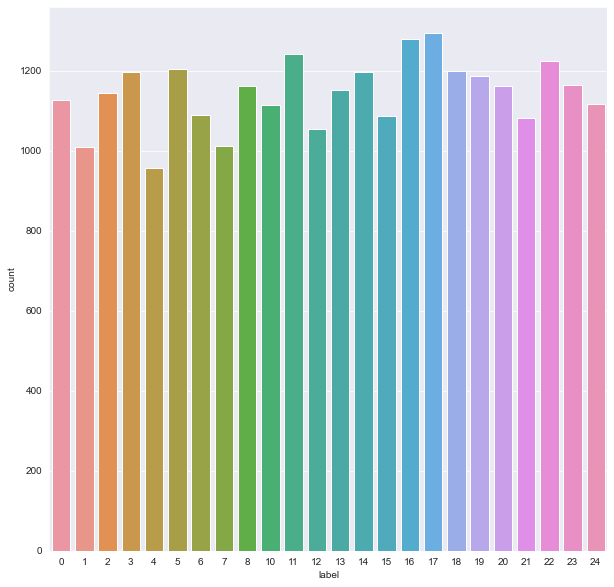

In [5]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train['label'])


In [6]:
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [10]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'j', 'K' , 'L' , 'M' , 'N' , 'O' , 'P' , 'Q' , 'R' , 'S' , 'T' ,'U' , 'V' , 'W' , 'X' , 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

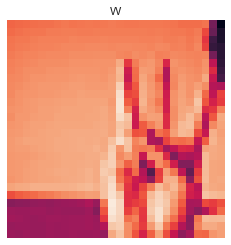

In [11]:
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28)))
plt.imshow(train_set[i,1:].reshape((28,28)))
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

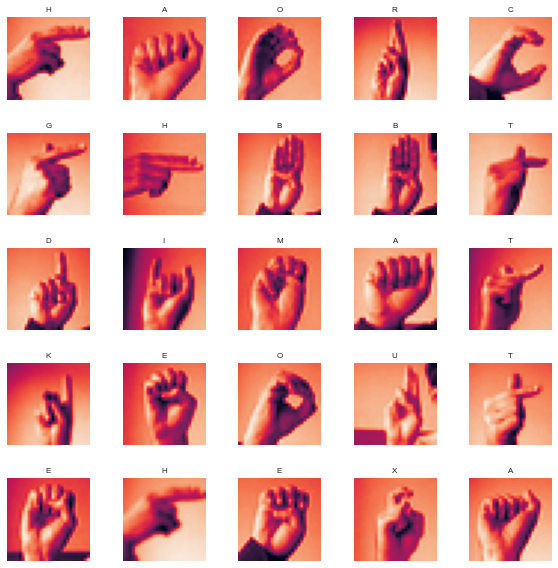

In [12]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flatten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables
# Select a random number
  index = np.random.randint(0, n_train)
# read and display an image with the selected index
  axes[i].imshow( train_set[index,1:].reshape((28,28)) )
  label_index = int(train_set[index,0])
  axes[i].set_title(class_names[label_index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [10]:
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]
X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

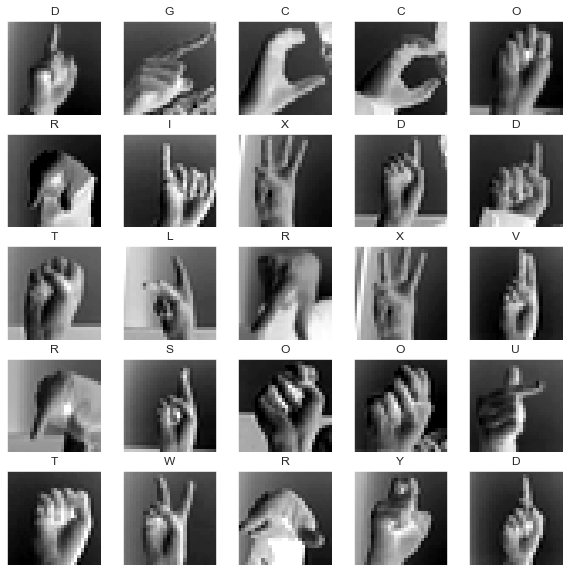

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
  label_index = int(y_train[i])
  plt.title(class_names[label_index])
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers,optimizers



In [14]:
model=Sequential()
model.add(Dense(404,kernel_regularizer=regularizers.l2(0.0005), activation='relu', input_dim=784))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(404,kernel_regularizer=regularizers.l2(0.0005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(404,kernel_regularizer=regularizers.l2(0.0005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(404,kernel_regularizer=regularizers.l2(0.0005), activation='relu'))
model.add(Dense(25,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 404)               317140    
_________________________________________________________________
batch_normalization (BatchNo (None, 404)               1616      
_________________________________________________________________
dropout (Dropout)            (None, 404)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 404)               163620    
_________________________________________________________________
batch_normalization_1 (Batch (None, 404)               1616      
_________________________________________________________________
dropout_1 (Dropout)          (None, 404)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 404)               1

In [15]:
optimizer = optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\imson\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [17]:
history = model.fit(X_train, y_train, batch_size=512,epochs=40,verbose=2,validation_data= (X_validate, y_validate),callbacks=[learning_rate_reduction])

Epoch 1/40
43/43 - 12s - loss: 2.3606 - accuracy: 0.5421 - val_loss: 3.1739 - val_accuracy: 0.5128
Epoch 2/40
43/43 - 0s - loss: 1.2004 - accuracy: 0.8658 - val_loss: 2.3992 - val_accuracy: 0.5686
Epoch 3/40
43/43 - 0s - loss: 0.9482 - accuracy: 0.9371 - val_loss: 1.7370 - val_accuracy: 0.7867
Epoch 4/40
43/43 - 0s - loss: 0.8371 - accuracy: 0.9629 - val_loss: 1.8985 - val_accuracy: 0.6613
Epoch 5/40
43/43 - 0s - loss: 0.7716 - accuracy: 0.9696 - val_loss: 1.9272 - val_accuracy: 0.6017

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/40
43/43 - 0s - loss: 0.7043 - accuracy: 0.9843 - val_loss: 1.0944 - val_accuracy: 0.8401
Epoch 7/40
43/43 - 0s - loss: 0.6633 - accuracy: 0.9906 - val_loss: 0.8540 - val_accuracy: 0.9275
Epoch 8/40
43/43 - 0s - loss: 0.6325 - accuracy: 0.9931 - val_loss: 0.7902 - val_accuracy: 0.9357
Epoch 9/40
43/43 - 0s - loss: 0.6095 - accuracy: 0.9934 - val_loss: 0.8239 - val_accuracy: 0.9252
Epoch 10/40
43/43 - 0s - loss: 0.592

In [18]:
predicted_classes = model.predict_classes(X_test)

C:\Users\imson\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test, predicted_classes))
print("Accuracy:",accuracy_score(y_test, predicted_classes)*100)

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       331
         1.0       0.97      1.00      0.99       432
         2.0       0.92      1.00      0.96       310
         3.0       0.93      1.00      0.96       245
         4.0       0.96      0.95      0.95       498
         5.0       0.89      0.97      0.92       247
         6.0       0.93      0.82      0.88       348
         7.0       0.95      0.92      0.93       436
         8.0       0.91      0.78      0.84       288
        10.0       0.80      0.49      0.61       331
        11.0       0.78      1.00      0.88       209
        12.0       0.79      0.84      0.82       394
        13.0       0.70      0.50      0.58       291
        14.0       0.99      0.83      0.91       246
        15.0       0.97      1.00      0.99       347
        16.0       0.80      0.88      0.84       164
        17.0       0.22      0.44      0.29       144
        18.0       0.57    

Text(0.5, 1.0, 'Accuracy evolution')

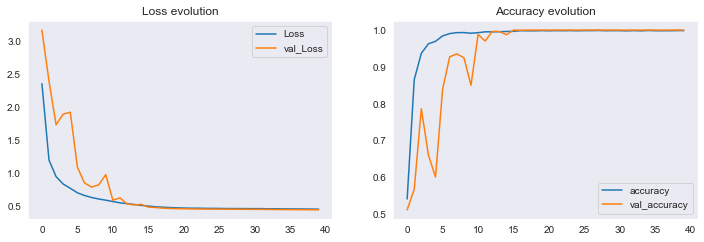

In [20]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

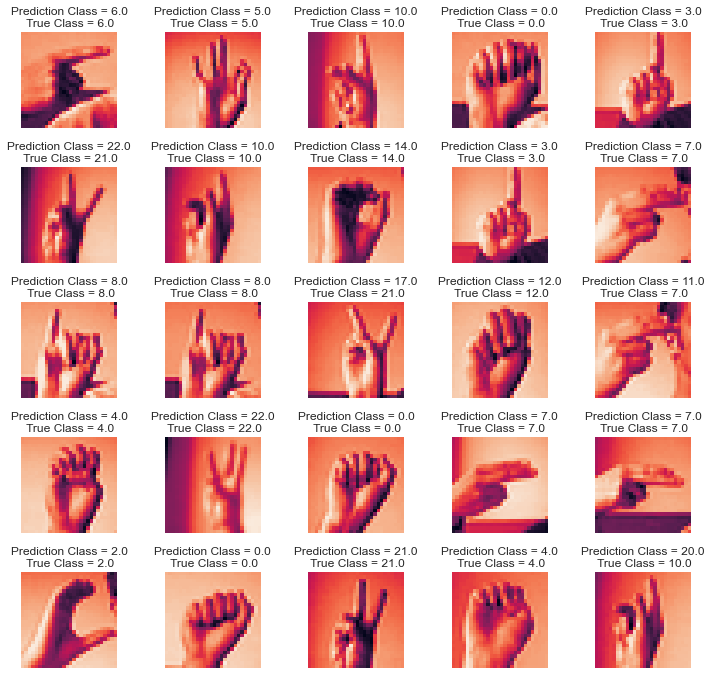

In [21]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [24]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X' , 'y' ]


Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

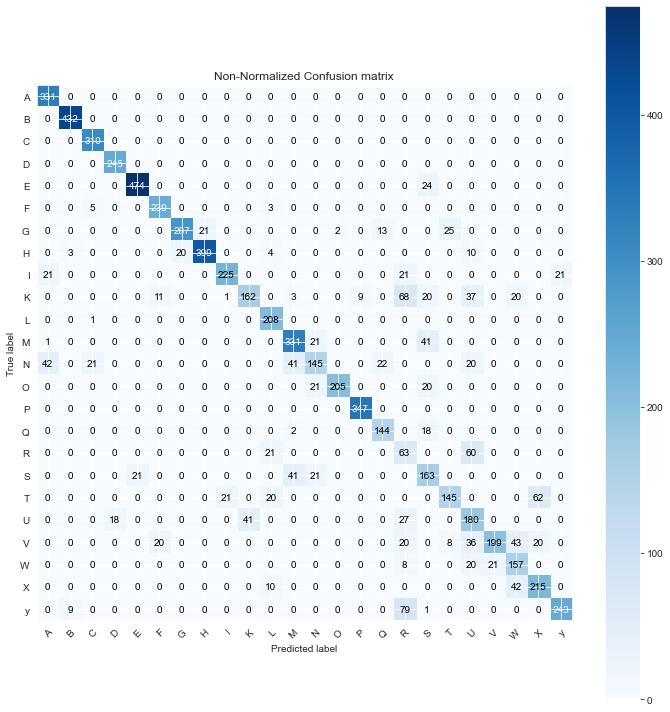

In [25]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

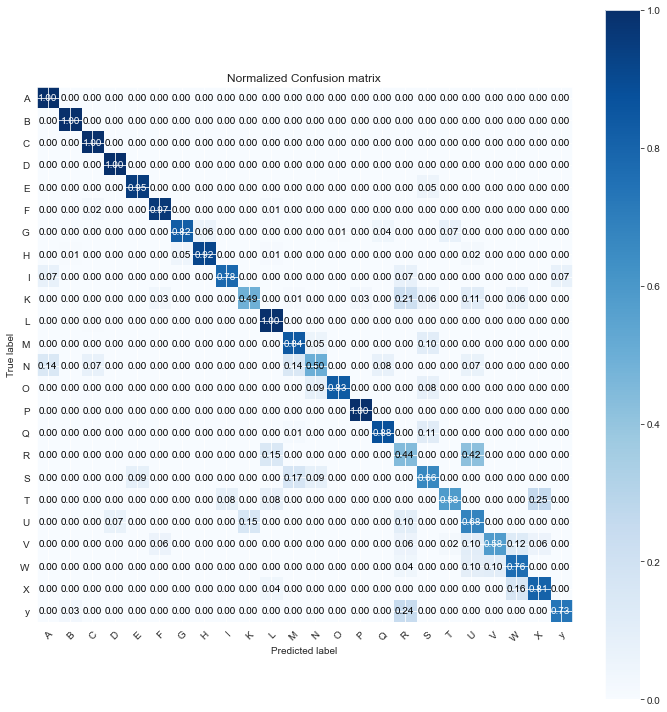

In [26]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Normalized Confusion matrix')
plt.show()

In [27]:
#Convert To One Hot encoded Vector
labels = np.zeros((y_test.shape[0],25))
temp = pd.DataFrame(labels)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
for i in range(y_test.shape[0]):
  index = int(y_test[i])
  labels[i][index] = 1

In [29]:
print(labels.shape)

(7172, 25)


In [30]:
temp = pd.DataFrame(y_test)
temp.head()

,0
0,6.0
1,5.0
2,10.0
3,0.0
4,3.0


In [31]:
temp = pd.DataFrame(labels)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
def convert_to_one_hot_encoded(y):
  output_classes = 25
  labels = np.zeros((y.shape[0],output_classes))
  for i in range(y.shape[0]):
    index = int(y[i])
    labels[i][index] = 1
  return labels

In [33]:
from sklearn.metrics import roc_auc_score
predictions = convert_to_one_hot_encoded(predicted_classes)
y_actual = convert_to_one_hot_encoded(y_test)
scores = []
for i in range(y_actual.shape[0]):
  scores.append(roc_auc_score(y_actual[i],predictions[i]))
scores = np.array(scores)
print(np.mean(scores)*100)

90.39232431678751
